In [341]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [338]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

In [339]:
trainData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [340]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

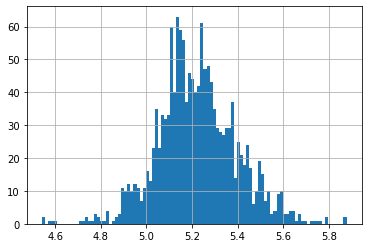

In [176]:
# Korelasyon matrislerinin doğruluğunu artırmak için öncelikle satış fiyatlarına 
# log transform uygula. 
trainData["SalePrice"]=np.log10(trainData["SalePrice"])
trainData["SalePrice"].hist(bins=100)
plt.show()

### Drop Cols.

In [177]:
# Bu sütunlarda çok fazla sayıda Null değer var. 
dropCols = ["Alley","FireplaceQu","Fence","MiscFeature","Id","PoolQC"]
trainData.drop(dropCols,inplace=True,axis=1)
testData.drop(dropCols,inplace=True,axis=1)

### Split

In [178]:
floatCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.float64)[0]]
intCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.int64)[0]]
objCols = trainData.columns[np.where(trainData[trainData.columns].dtypes == object)[0]]

### Float Cols.

In [179]:
trainData.loc[:,floatCols].describe()

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
count,1201.000000,1452.000000,1379.000000,1460.000000
mean,70.049958,103.685262,1978.506164,5.221979
std,24.284752,181.066207,24.689725,0.173480
min,21.000000,0.000000,1900.000000,4.542825
25%,59.000000,0.000000,1961.000000,5.113860
50%,69.000000,0.000000,1980.000000,5.212188
75%,80.000000,166.000000,2002.000000,5.330414
max,313.000000,1600.000000,2010.000000,5.877947


In [180]:
# GarageYrBlt -> Garage Age
trainData["GarageAge"] = trainData["GarageYrBlt"] - trainData["GarageYrBlt"].min()
trainData.drop("GarageYrBlt",inplace=True,axis=1)

# Float col. isimlerini yeniden al
floatCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.float64)[0]]

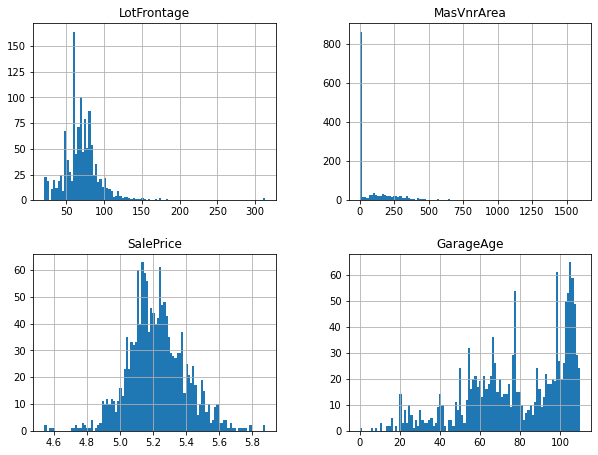

In [181]:
# Histogram yazdır
trainData[floatCols].hist(bins=100,figsize=(10,7.5))
plt.show()

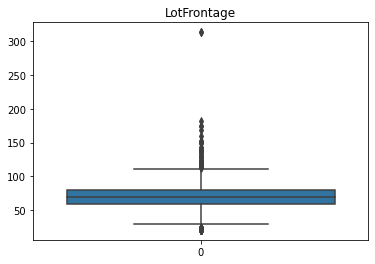

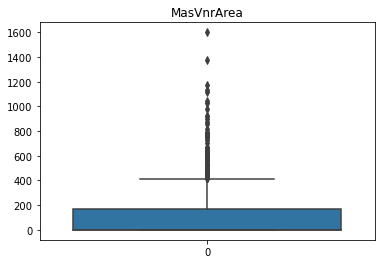

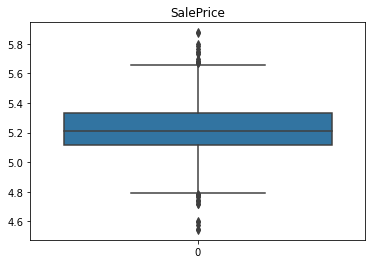

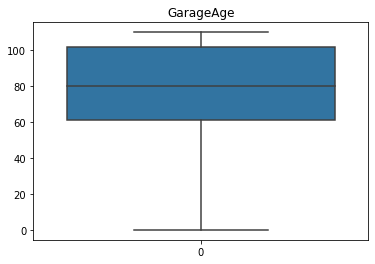

In [182]:
# Outlier olup olmadığını kontrol etmek için box plot yazdır
for col in floatCols:
    plt.title(col)
    sns.boxplot(data = trainData[col])
    plt.show()

In [183]:
# LotFrontage outlier temizle
trainData.drop(np.where(trainData["LotFrontage"]>200)[0],inplace=True,axis=0)
trainData.reset_index(inplace=True,drop=True)

In [184]:
# LotFrontage ve MasVnrArea -> log transform
trainData["LotFrontage"]=np.log10(trainData["LotFrontage"]+1)
trainData["MasVnrArea"]=np.log10(trainData["MasVnrArea"]+1)

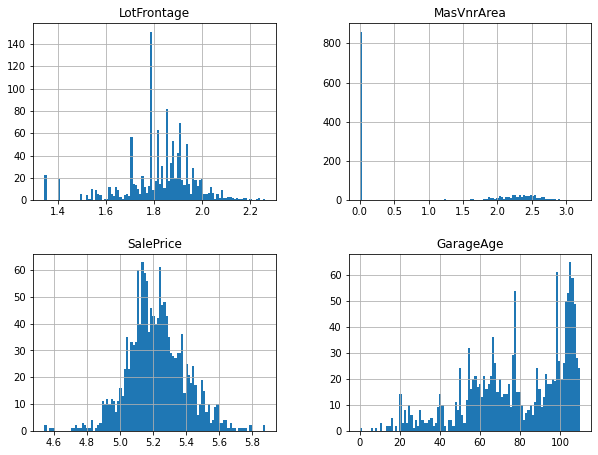

In [185]:
# Histogram yazdır
trainData[floatCols].hist(bins=100,figsize=(10,7.5))
plt.show()

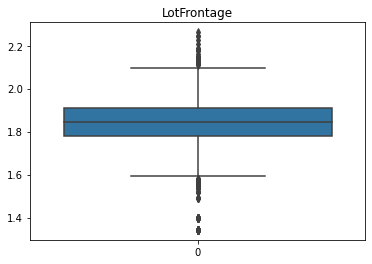

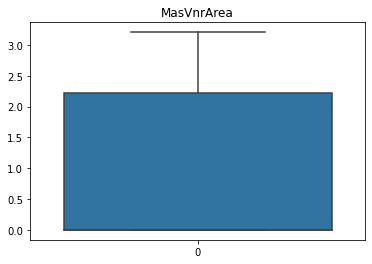

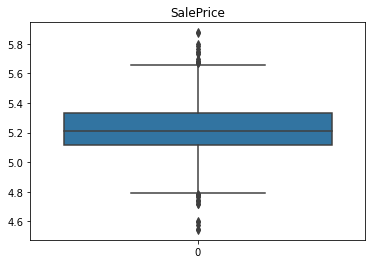

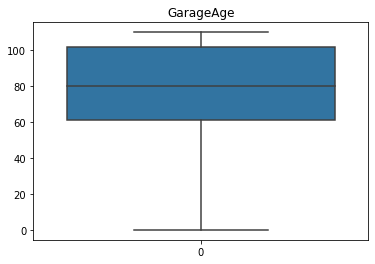

In [186]:
# Box plot yeniden yazdır
for col in floatCols:
    plt.title(col)
    sns.boxplot(data = trainData[col])
    plt.show()

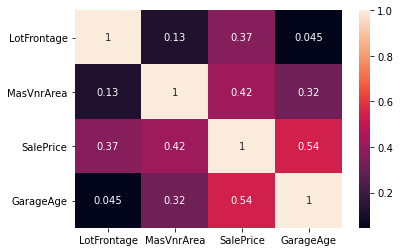

In [187]:
# Corr. Matrix
corrMatrix=trainData[floatCols].corr()
sns.heatmap(corrMatrix ,annot=True)
plt.show()

# Tüm float sütunların SalePrice ile önemli derecede korelasyonu var !!!

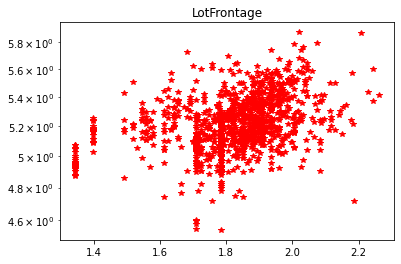

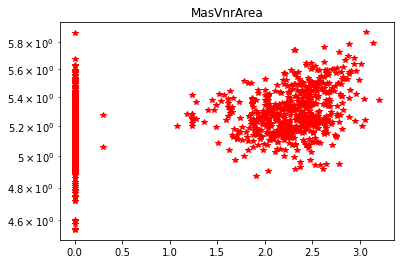

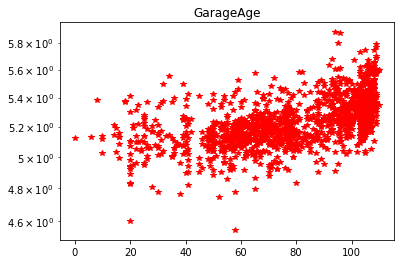

In [188]:
for col in floatCols:
    if col != "SalePrice":
        plt.yscale("log")
        plt.title(col)
        plt.plot(trainData[col],trainData["SalePrice"],"r*")
        plt.show()

### Int Cols.

Categorical sütunlarla ilgilen

In [189]:
trainData.loc[:,intCols].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.920439,10468.471879,6.096022,5.574760,1971.250343,1984.834705,440.085734,46.613169,567.589163,1054.288066,...,472.310014,94.227023,46.524005,21.984225,3.414266,15.081619,2.433471,43.548697,6.322359,2007.815501
std,42.318471,9879.455077,1.379962,1.112835,30.206855,20.642513,435.587982,161.420729,442.033296,418.380493,...,212.511552,125.361232,65.977740,61.155666,29.337173,55.792877,38.209947,496.460799,2.699105,1.328989
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.250000,796.000000,...,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,9475.000000,6.000000,5.000000,1973.000000,1994.000000,382.000000,0.000000,479.500000,991.500000,...,479.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,808.000000,1297.750000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2260.000000,1474.000000,2336.000000,3206.000000,...,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


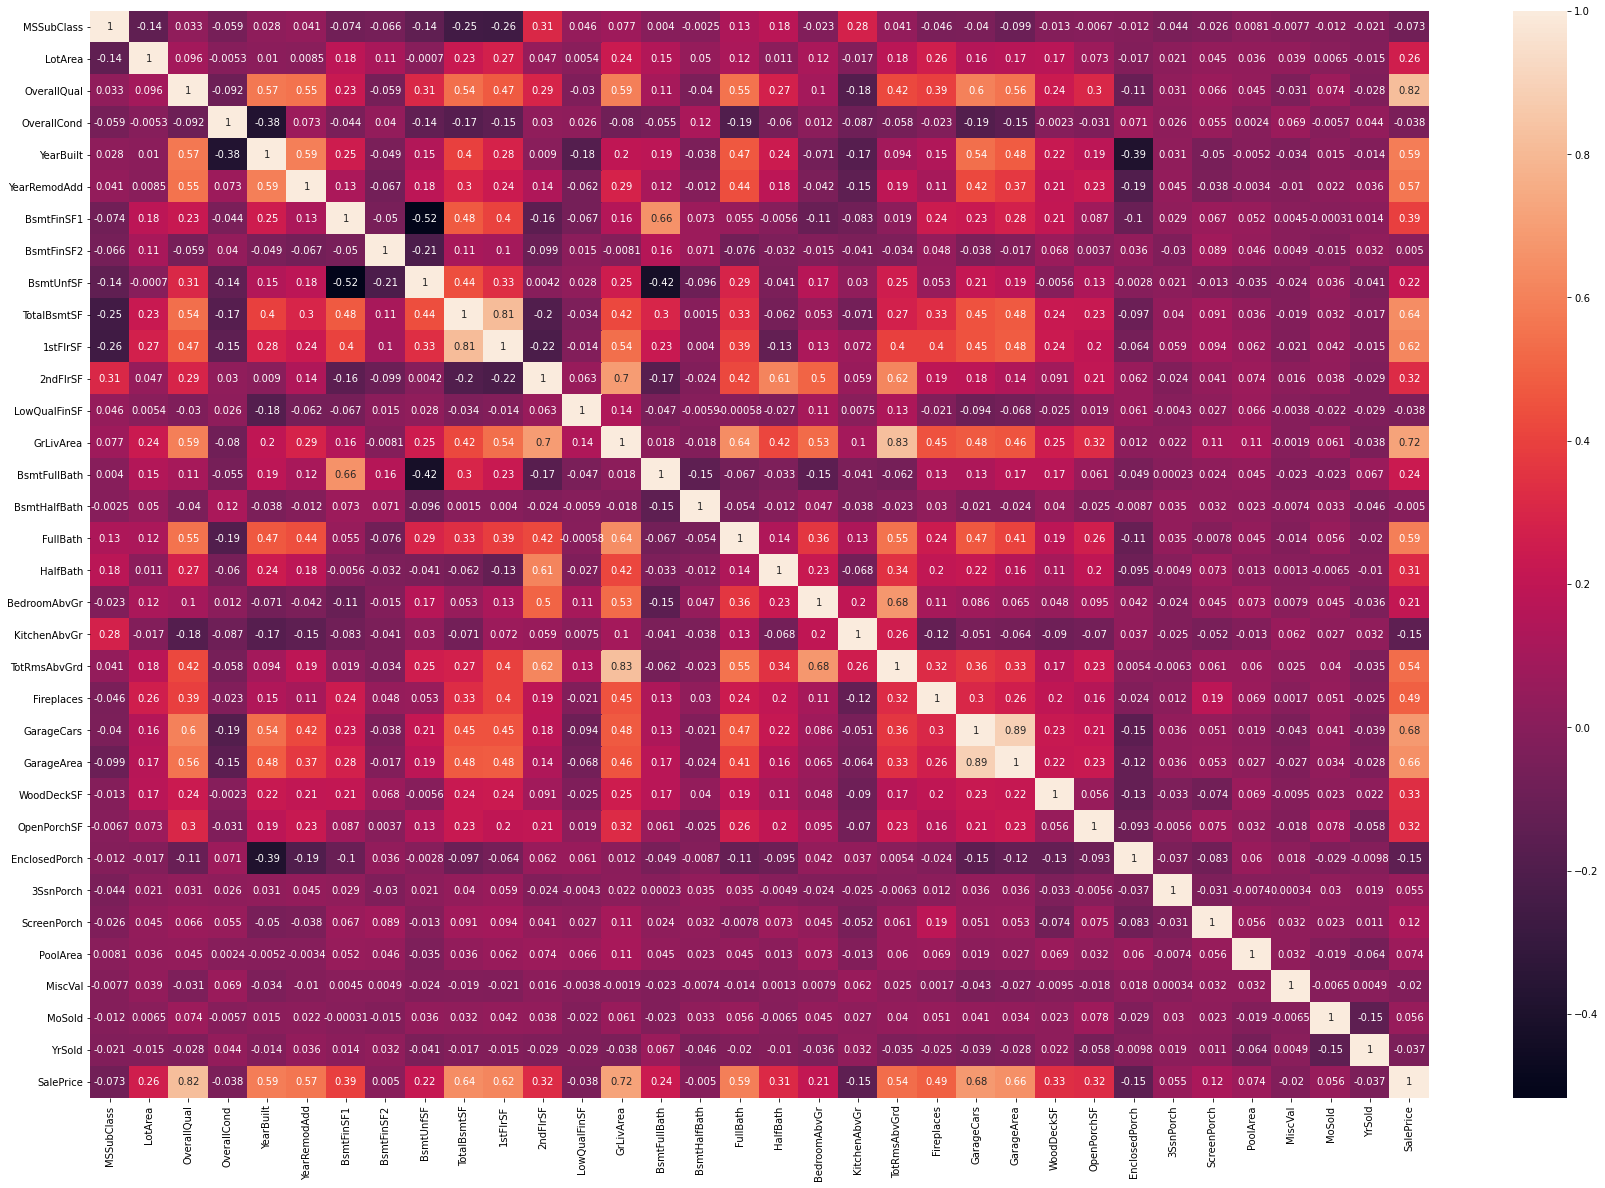

In [190]:
corrCols = list(intCols)
corrCols.append("SalePrice")
corrMatrix = trainData[corrCols].corr()
plt.figure(figsize=(30,20))
sns.heatmap(corrMatrix,annot = True)
plt.show()

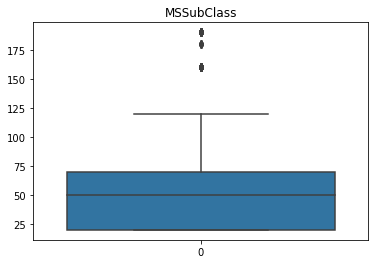

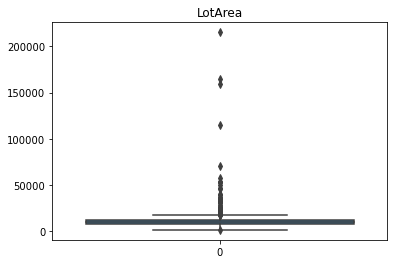

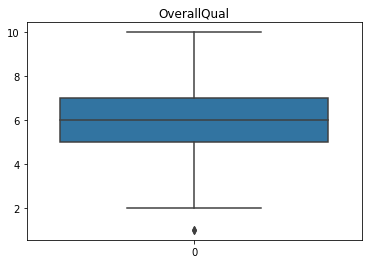

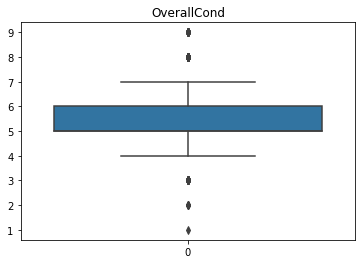

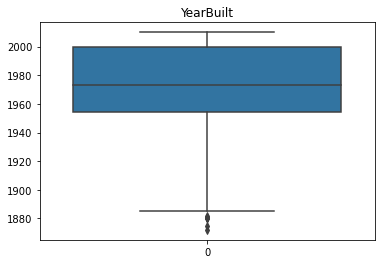

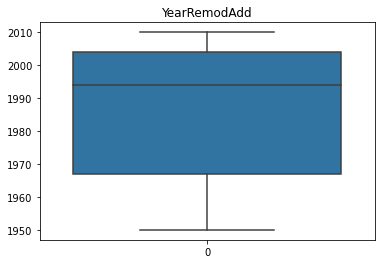

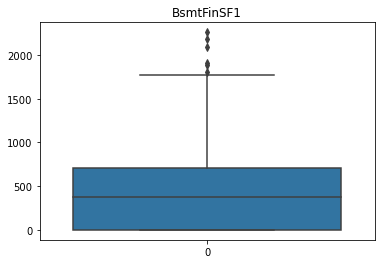

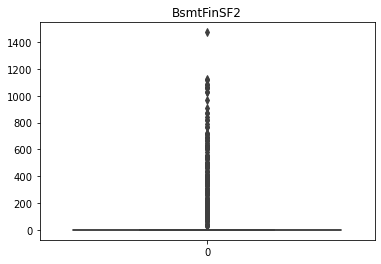

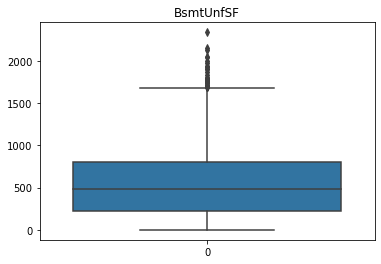

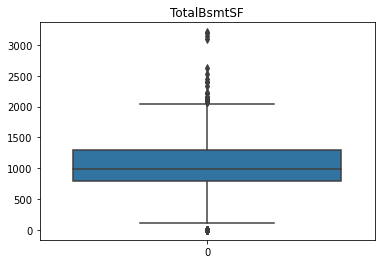

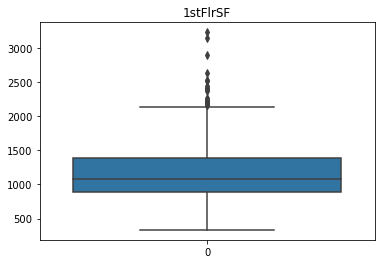

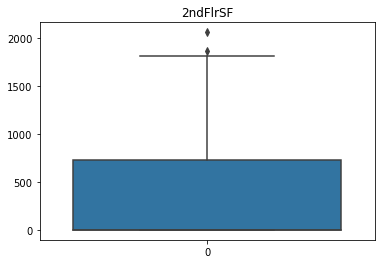

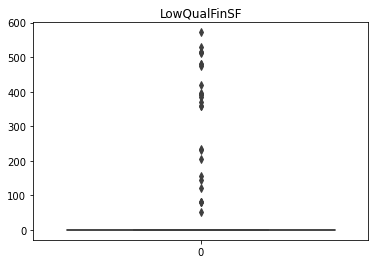

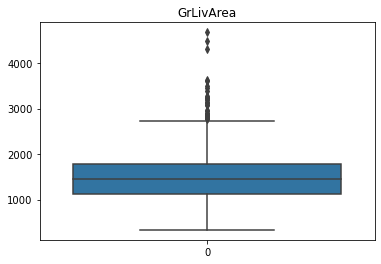

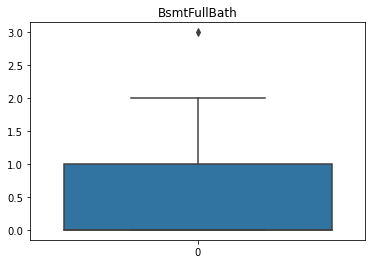

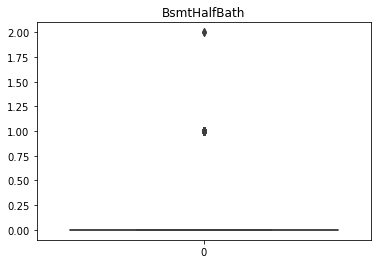

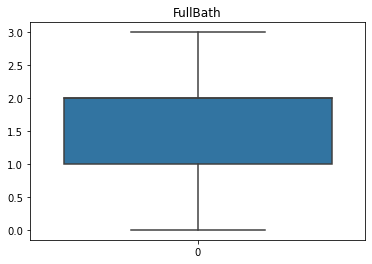

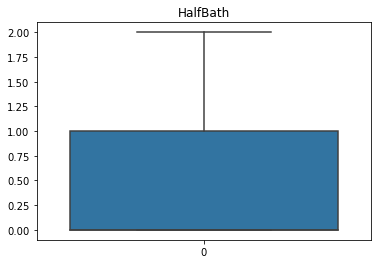

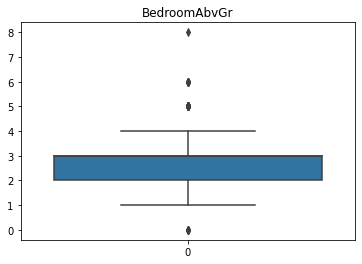

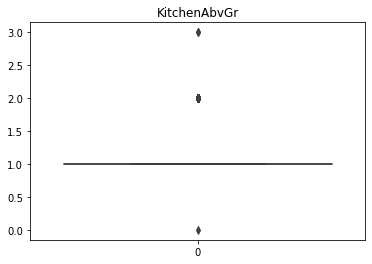

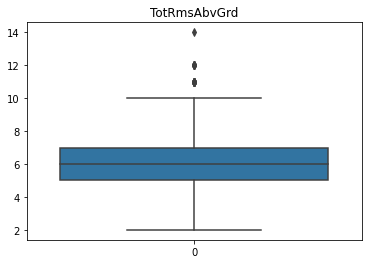

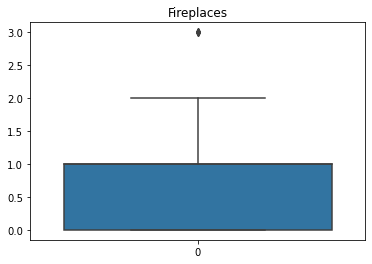

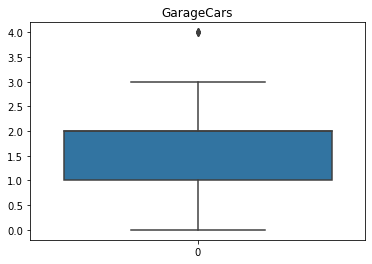

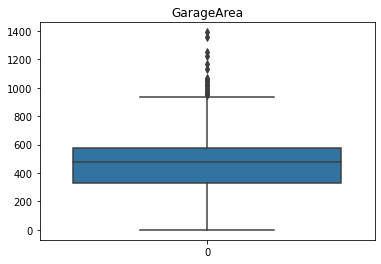

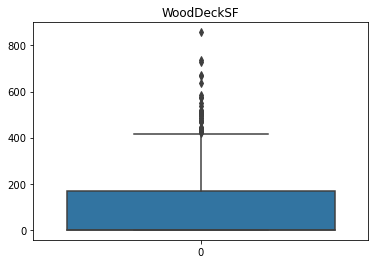

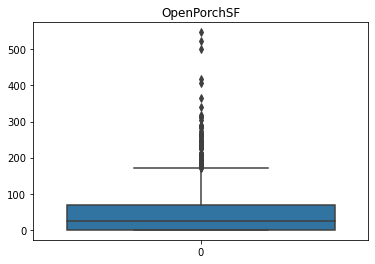

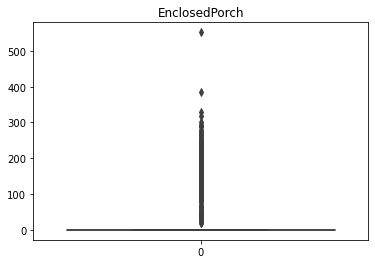

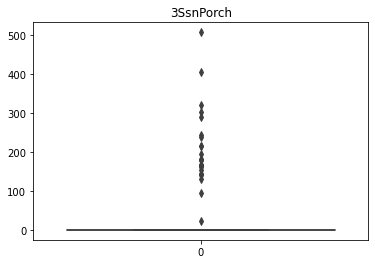

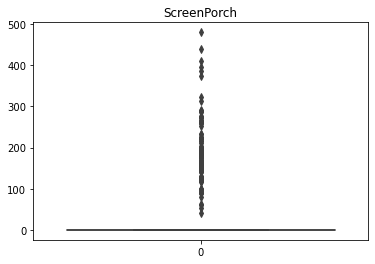

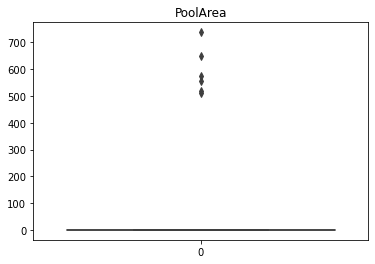

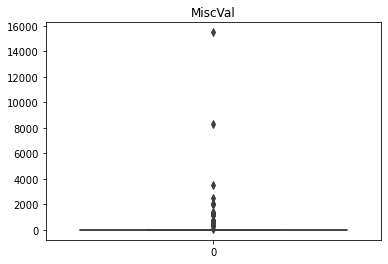

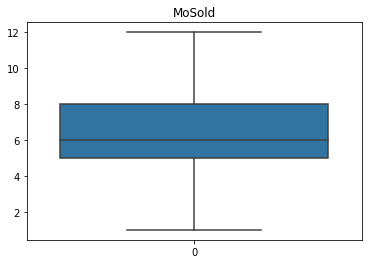

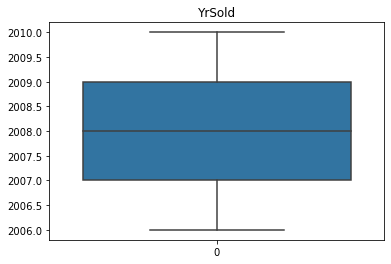

In [191]:
# Box plot
for col in intCols:
    plt.title(col)
    sns.boxplot(data = trainData[col])
    plt.show()

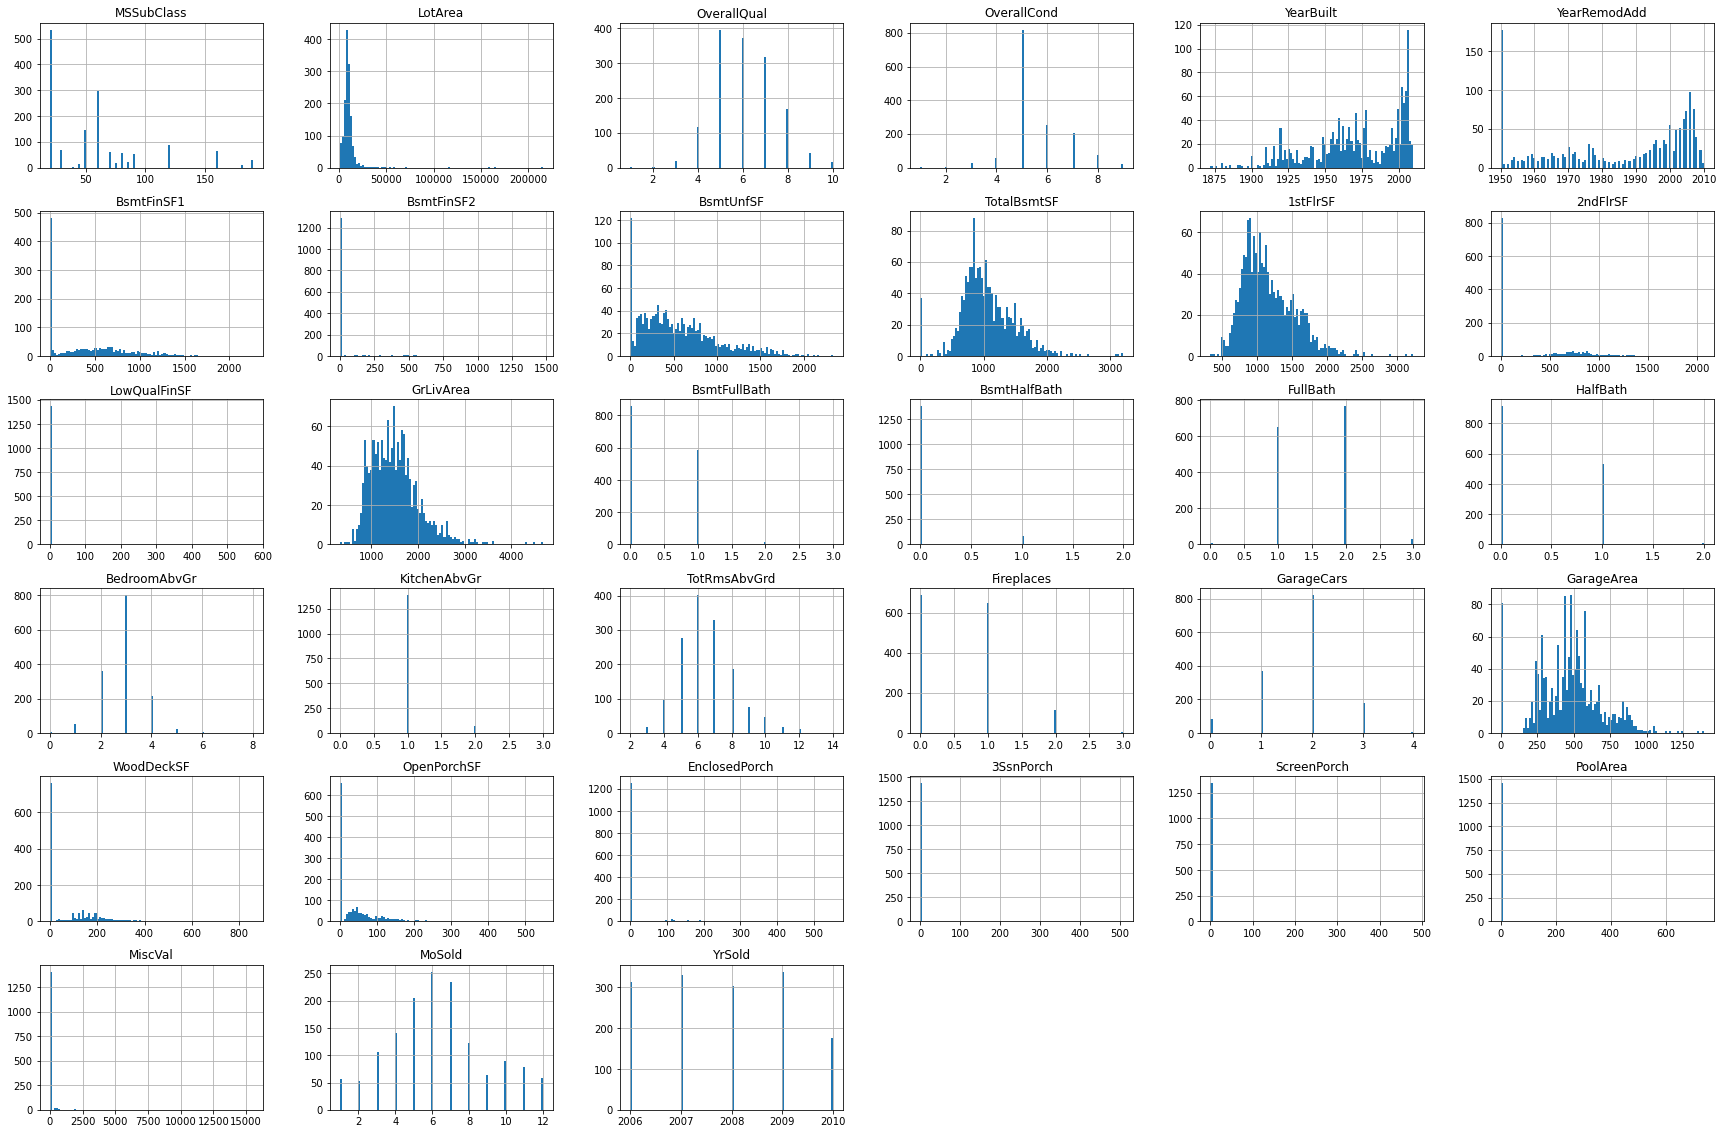

In [192]:
# Hist
trainData[intCols].hist(bins=100,figsize=(30,20))
plt.show()

In [193]:
# Unique değerleri yazdır
for col in intCols:
    print(col,trainData[col].unique().shape[0])

MSSubClass 15
LotArea 1071
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
BsmtFinSF1 636
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 720
1stFlrSF 752
2ndFlrSF 416
LowQualFinSF 24
GrLivArea 859
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
GarageArea 440
WoodDeckSF 274
OpenPorchSF 201
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 7
MiscVal 21
MoSold 12
YrSold 5


In [194]:
# Az sayıda unique değer ,dolayısıyla düşük korelasyon.
dropCols = ["MiscVal","PoolArea","3SsnPorch","ScreenPorch",
"BsmtFinSF2","LowQualFinSF","YrSold","MoSold"]
trainData.drop(dropCols,inplace=True,axis=1)
intCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.int64)[0]]

In [195]:
#  YearBuilt -> Age
trainData["Age"] = trainData["YearBuilt"]-trainData["YearBuilt"].min()
trainData.drop("YearBuilt",inplace=True,axis=1)

#  YearRemodAdd -> RemodAge
trainData["RemodAge"] = trainData["YearRemodAdd"]-trainData["YearRemodAdd"].min()
trainData.drop("YearRemodAdd",inplace=True,axis=1)

# intCols yeniden çek
intCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.int64)[0]]

In [196]:
# PowerTransformer dan önce outlier temizle
tCols = ["LotArea","BsmtFinSF1","BsmtUnfSF",
"TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea",
"GarageArea","WoodDeckSF","OpenPorchSF"]

for col in tCols:
    vals = trainData[col].values
    limit = np.quantile(vals,q=0.99)
    trainData.drop(np.where(vals>limit)[0],axis=0,inplace=True)
    trainData.reset_index(inplace=True,drop=True)
print(trainData.shape)

(1314, 67)


In [197]:
tCols = ["LotArea","BsmtFinSF1","BsmtUnfSF",
"TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea",
"GarageArea","WoodDeckSF","OpenPorchSF"]
pTransformer = PowerTransformer()
pTransformer = pTransformer.fit(trainData[tCols].values)
transformedVals=pTransformer.transform(trainData[tCols].values)
trainData[tCols]=transformedVals

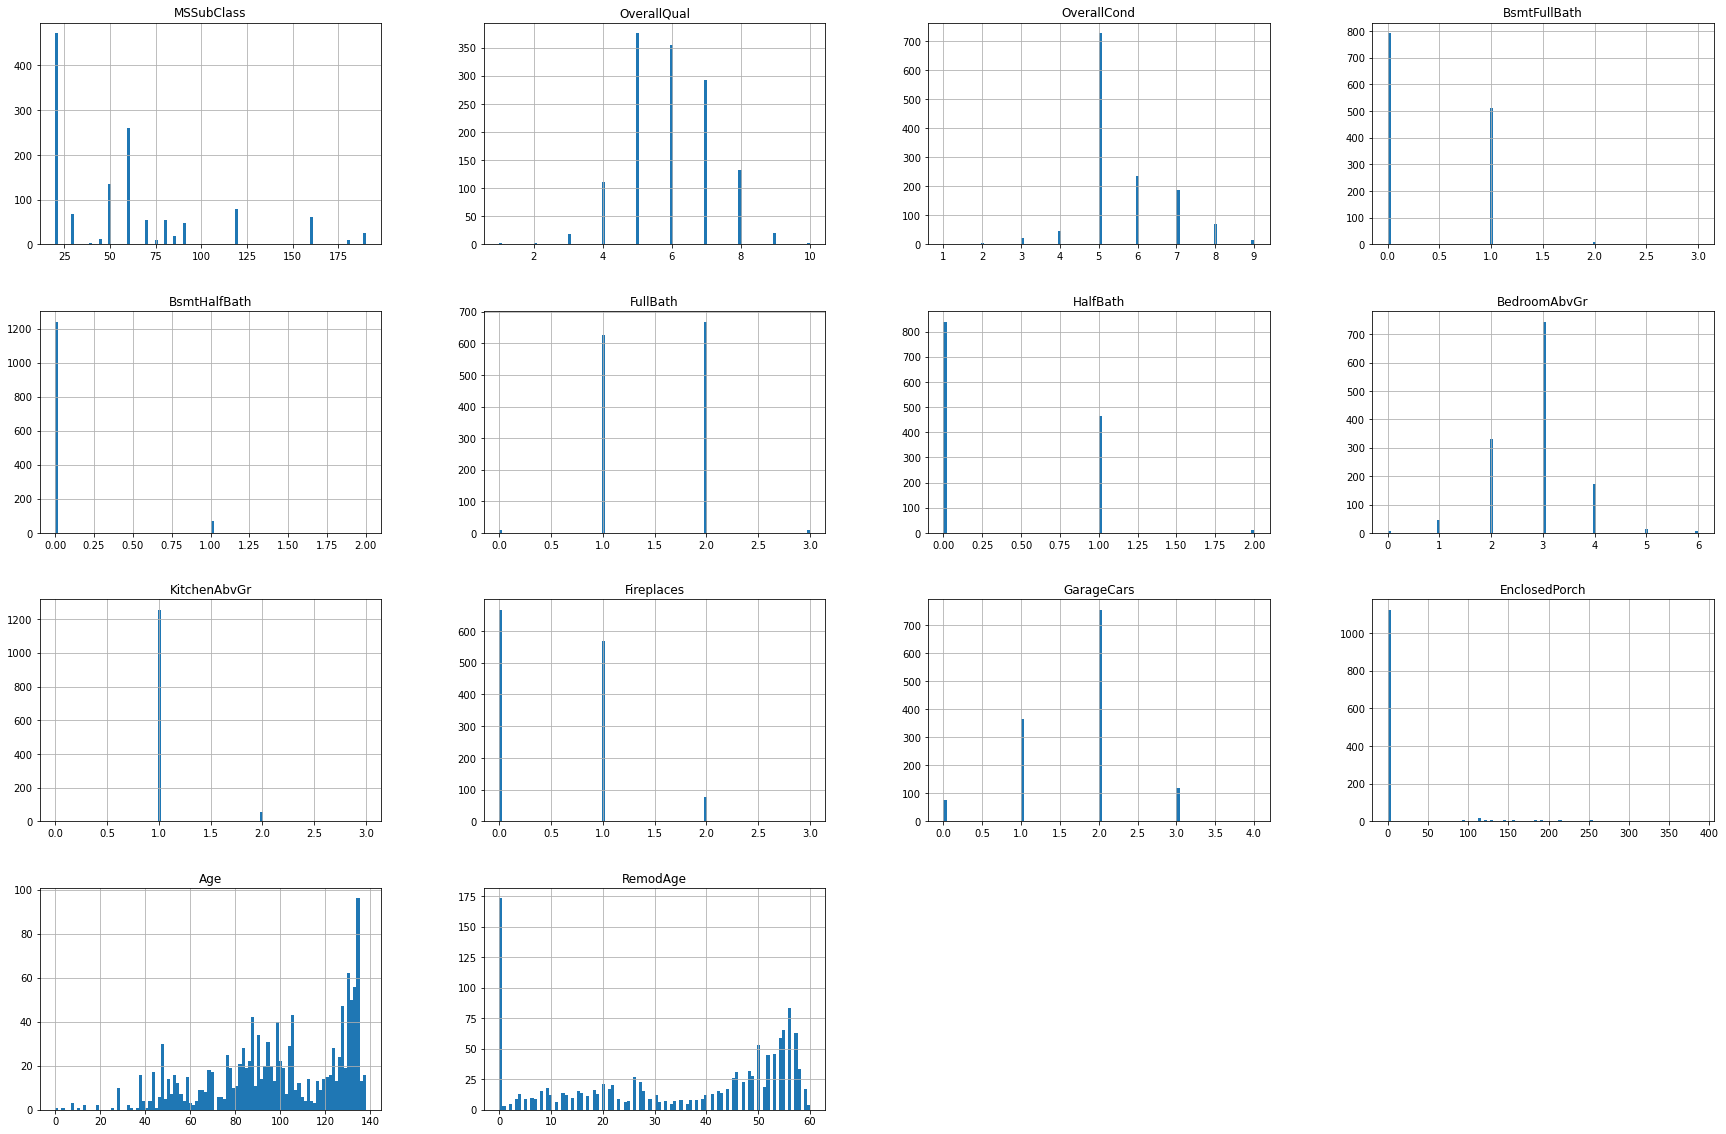

In [274]:
trainData[intCols].hist(bins=100,figsize=(30,20))
plt.show()

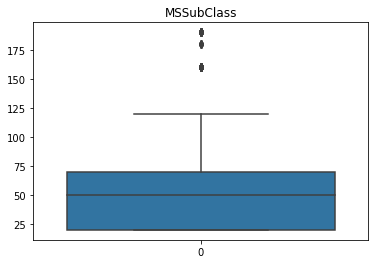

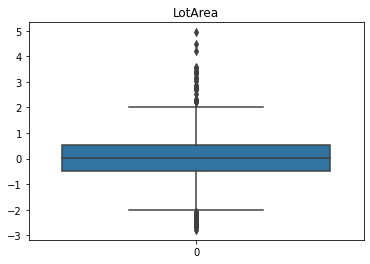

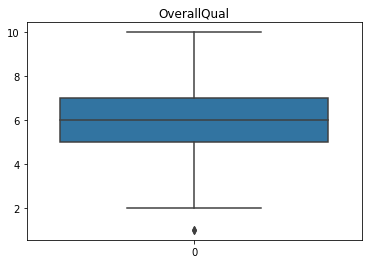

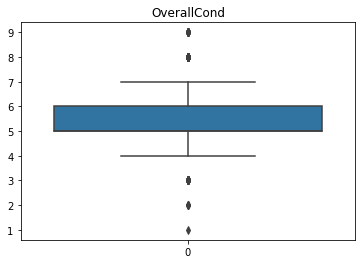

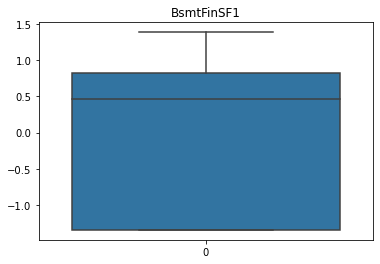

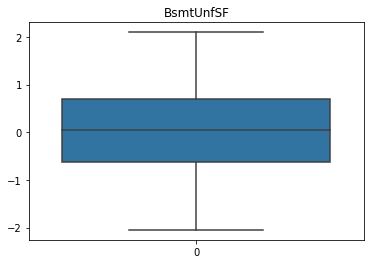

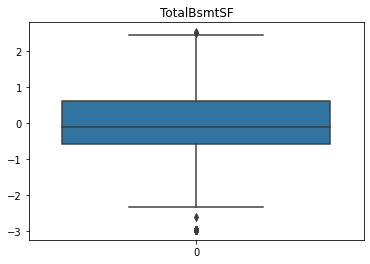

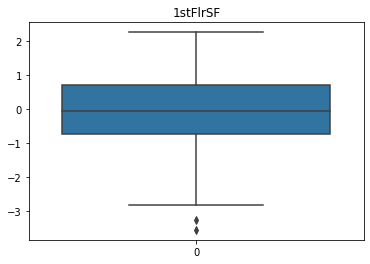

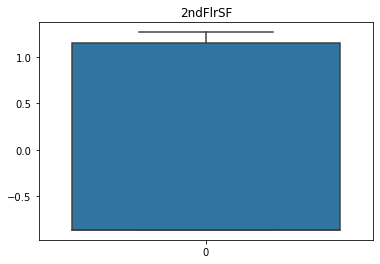

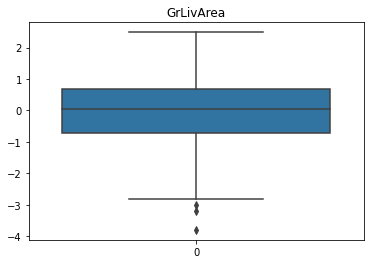

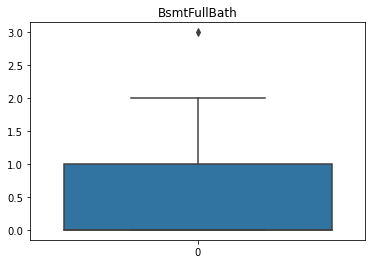

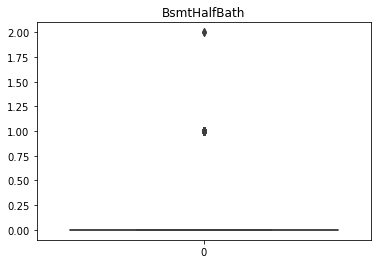

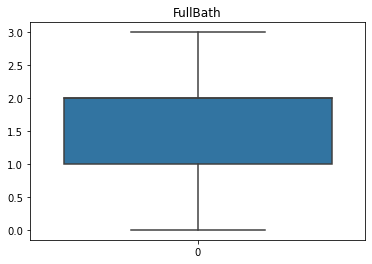

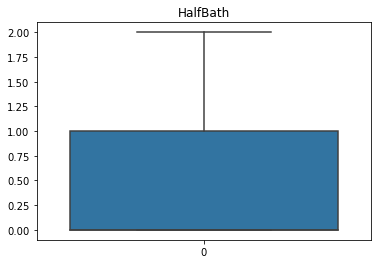

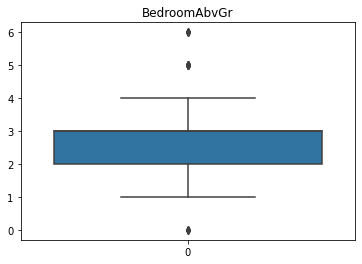

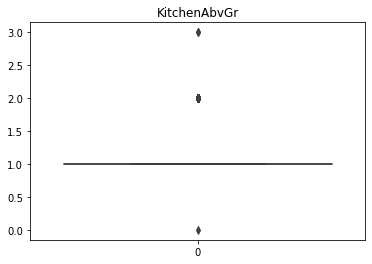

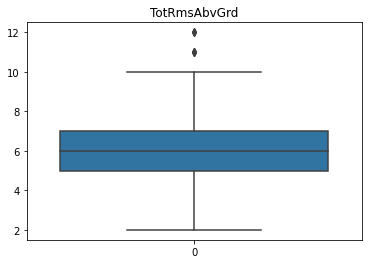

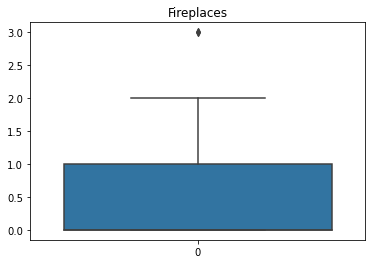

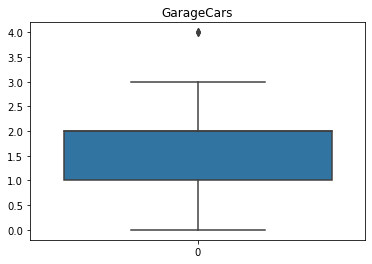

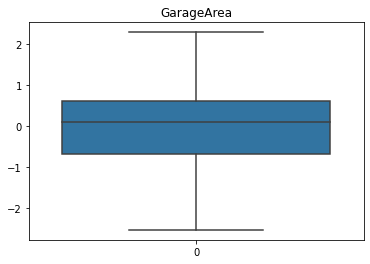

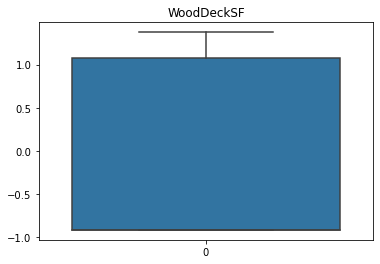

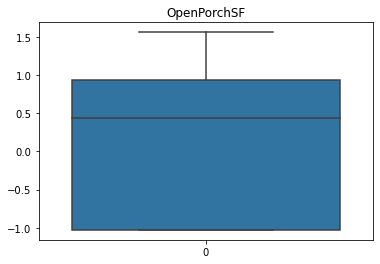

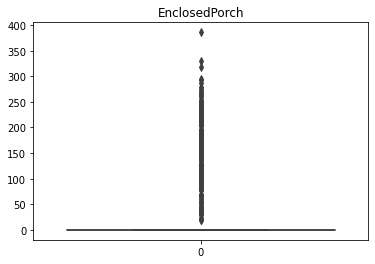

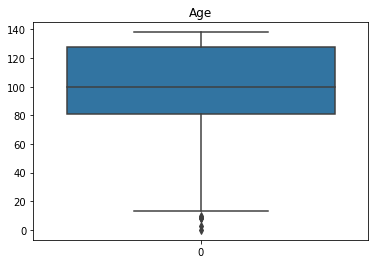

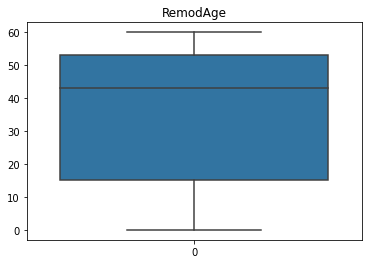

In [199]:
# Plot box plots 
for col in intCols:
    plt.title(col)
    sns.boxplot(data = trainData[col])
    plt.show()

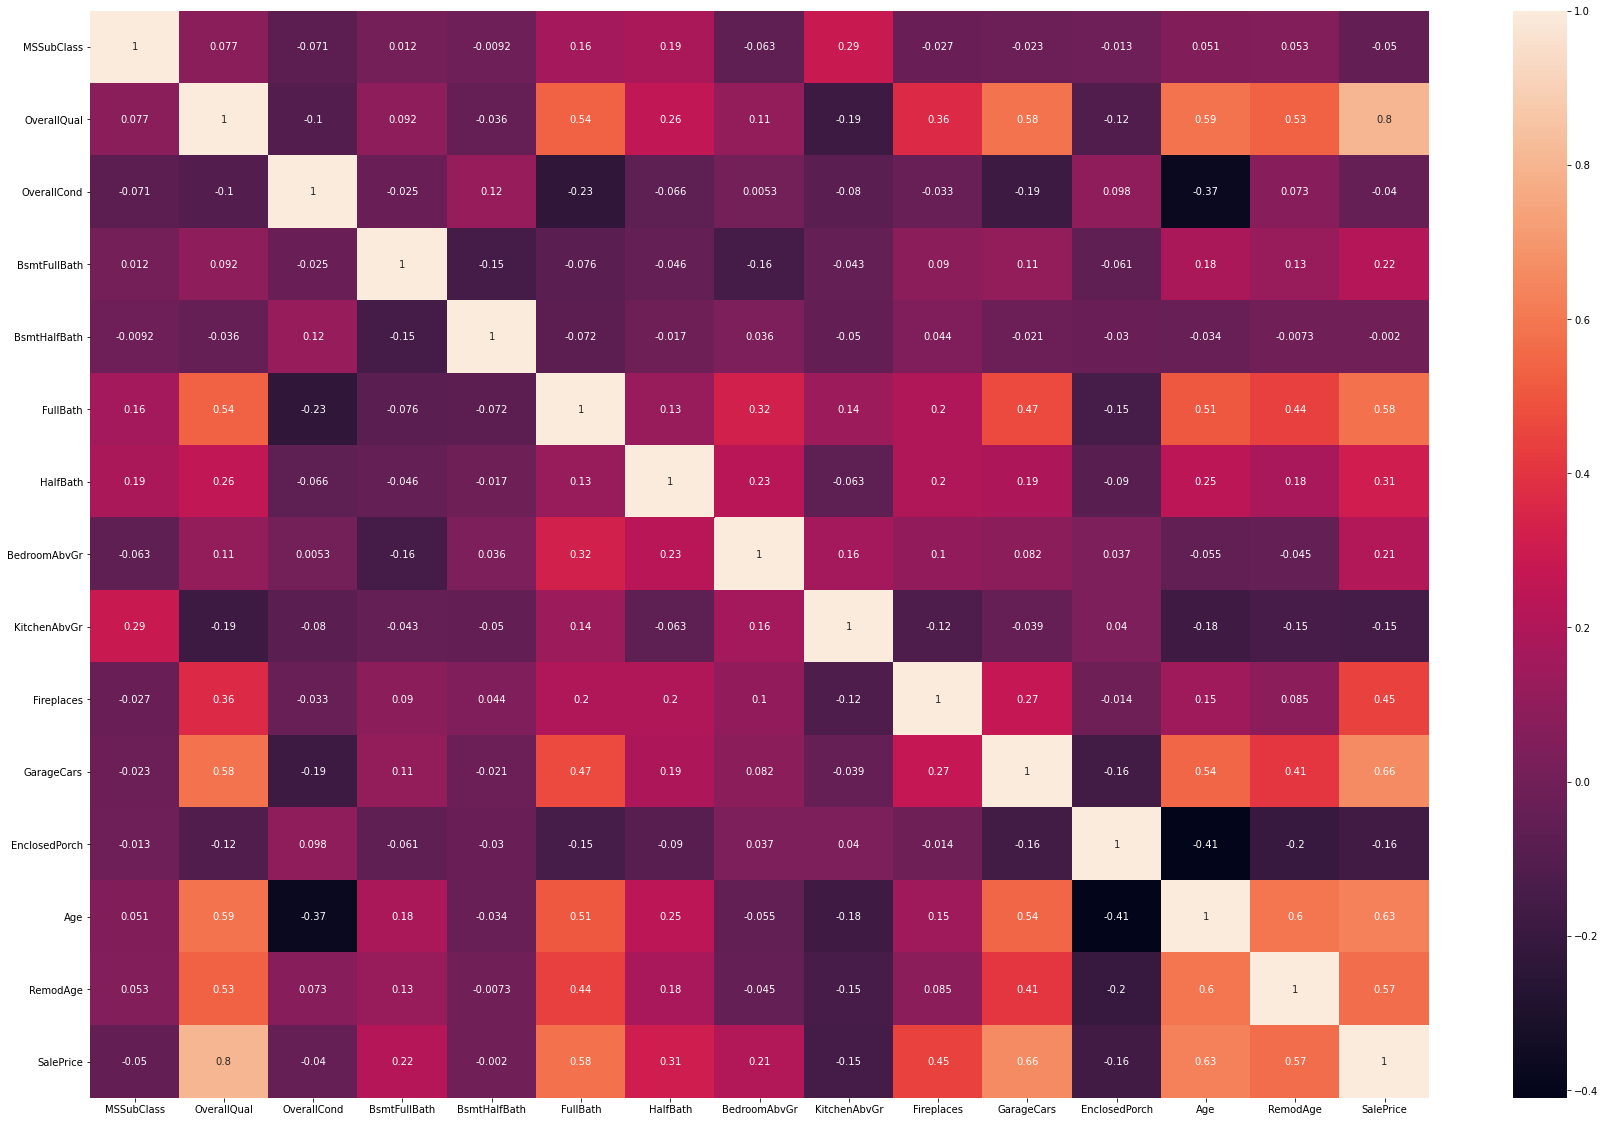

In [204]:
corrCols = list(intCols)
corrCols.append("SalePrice")
corrMatrix = trainData[corrCols].corr()
plt.figure(figsize=(30,20))
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [203]:
dropCols=[
    "TotRmsAbvGrd", # GrLivArea ile 0.81 korelasyonu var.
    "1stFlrSF",
    "2ndFlrSF"
]
trainData.drop(dropCols,axis=1,inplace=True)
intCols=trainData.columns[np.where(trainData[trainData.columns].dtypes==np.int64)[0]]

### Obj Columns

Şimdilik hepsini düşür

In [26]:
trainData[objCols].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1314,1314,1314,1314,1314,1314,1314,1314,1314,1314,...,1313,1314,1314,1238,1238,1238,1238,1314,1314,1314
unique,5,2,4,4,2,5,3,25,9,6,...,5,4,6,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1025,1311,854,1193,1313,959,1257,209,1139,1303,...,1192,690,1229,771,571,1177,1187,1199,1157,1096


In [205]:
orgVals = {}
for col in objCols:
    uniqueVals = trainData[col].unique()
    orgVals[col] = uniqueVals
    trainData[col].replace(uniqueVals,range(0,uniqueVals.shape[0],1),inplace=True)

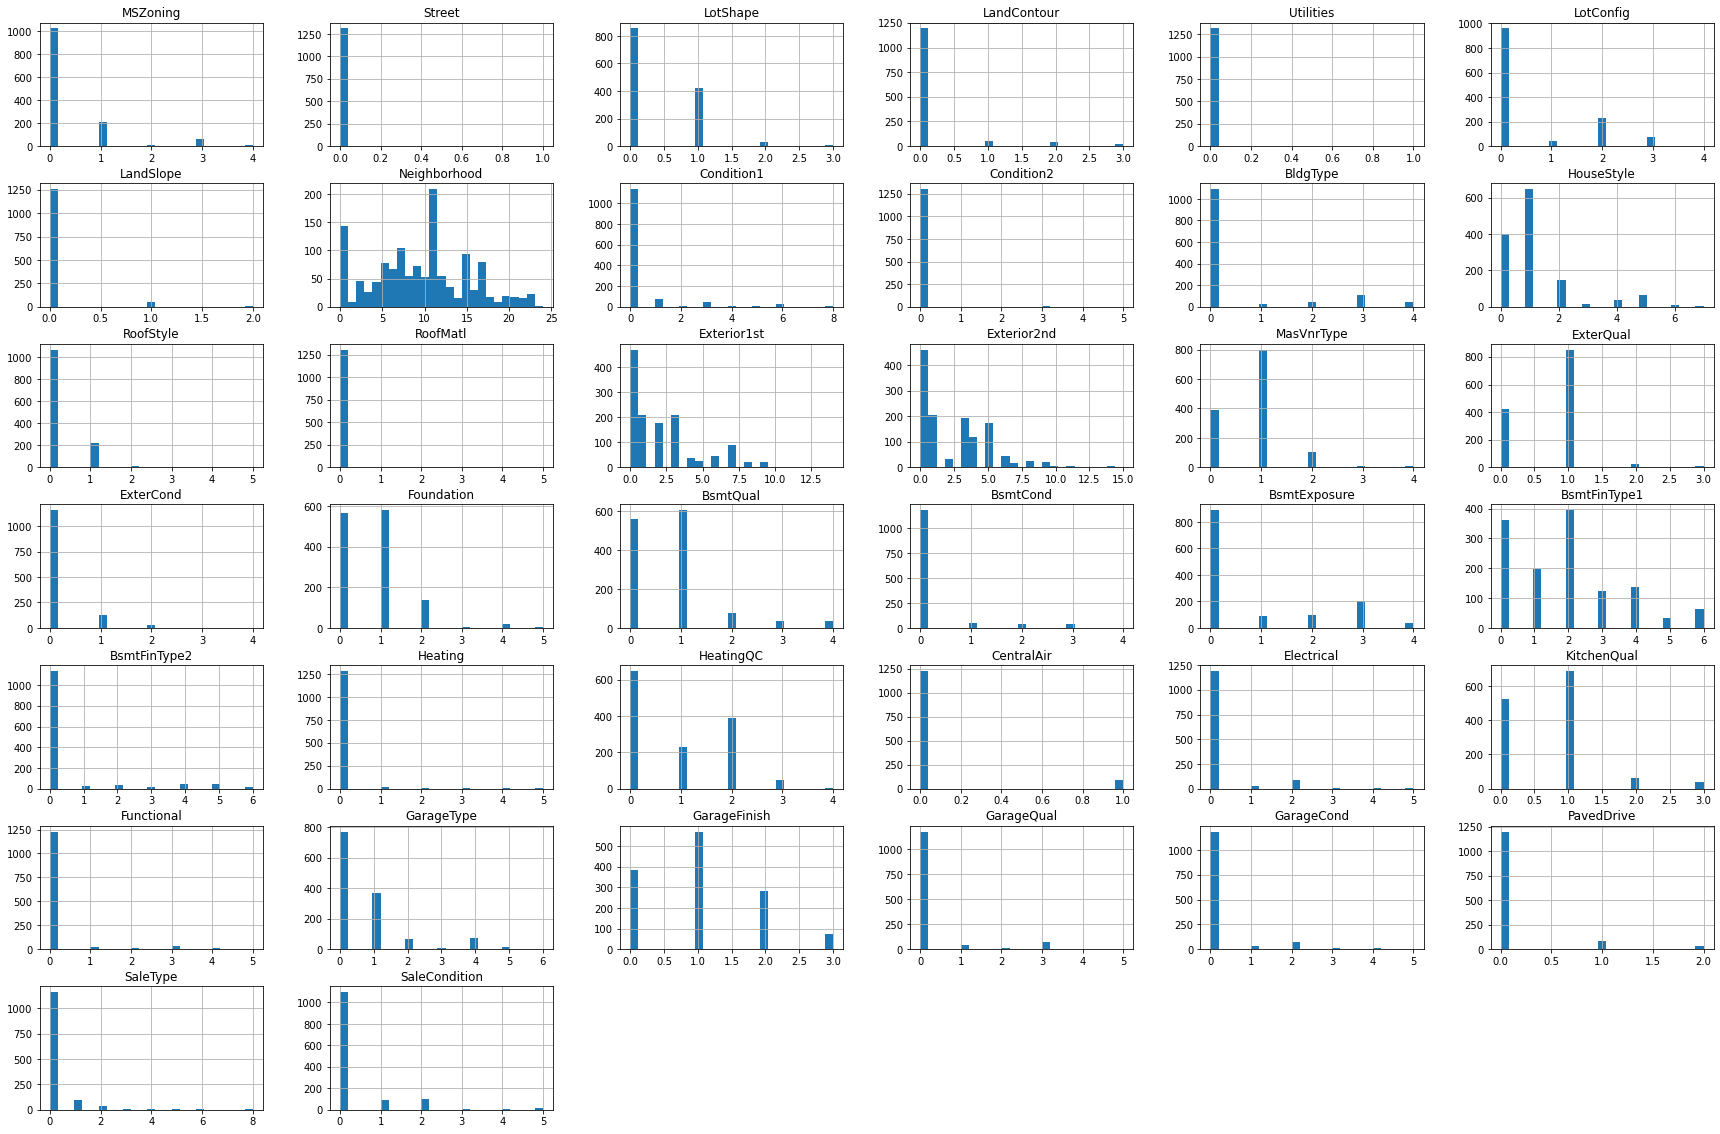

In [206]:
trainData[objCols].hist(bins=25,figsize=(30,20))
plt.show()

In [207]:
retainCols = ["MSZoning","LotShape","Neighborhood","Exterior1st","Exterior2nd",
"MasVnrType","ExterQual","Foundation","BsmtQual","BsmtExposure","BsmtFinType1",
"HeatingQC","KitchenQual","GarageType","GarageFinish"]
for ret in retainCols:
    objCols=np.delete(objCols,np.where(objCols == ret)[0],axis=0)
trainData.drop(objCols,inplace=True,axis=1)
objCols = retainCols

In [208]:
for col in objCols:
    trainData[col].replace(range(0,orgVals[col].shape[0],1),orgVals[col],inplace=True)

In [209]:
dummies = pd.get_dummies(trainData[objCols],drop_first=True)

In [210]:
trainData=pd.concat([trainData,dummies],axis=1)

In [211]:
trainData.drop(objCols,inplace=True,axis=1)

### PreProcessing

In [275]:
salePrices=trainData["SalePrice"].values
features = trainData.drop("SalePrice",axis=1).values

In [276]:
imp_mean = IterativeImputer(random_state=0)
features=imp_mean.fit(features).transform(features)

In [343]:
x_train,x_test,y_train,y_test=train_test_split(features,salePrices,test_size= 0.2,random_state=0)

In [344]:
#y_train=y_train.reshape(-1,1)
#y_test=y_test.reshape(-1,1)

In [345]:
cv = KFold(n_splits=10)

In [358]:
parameters = {"alpha":[0.1,0.25,0.5,0.75,1,1.5,2,2.5,3,5,10]}
gSearch = GridSearchCV(estimator = Ridge(),param_grid= parameters)
gSearch.fit(x_train,y_train)
gSearch.best_estimator_

Ridge(alpha=5)

In [359]:
fSelecter = Ridge(random_state=0,alpha=5)
fSelecter.fit(x_train,y_train)
print(fSelecter.score(x_test,y_test))

0.8988799407831911


In [360]:
print(np.quantile(cross_val_score(fSelecter, x_train, y_train, cv=cv, n_jobs=-1),q=[0.025,0.975]))

[0.85161812 0.93817654]


In [361]:
pred = fSelecter.predict(x_test)

gt = np.power(10,y_test)

pred = np.power(10,pred)

m = tf.keras.metrics.RootMeanSquaredError()
m.reset_state()
m.update_state(np.log(gt),np.log(pred))
m.result().numpy()

0.11069497

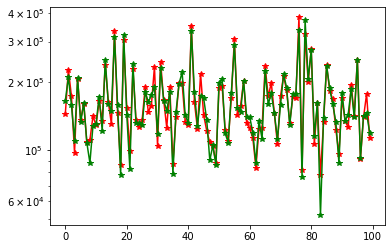

In [362]:
plt.yscale("log")
plt.plot(pred[:100],"r*-")
plt.plot(gt[:100],"g*-")
plt.show()

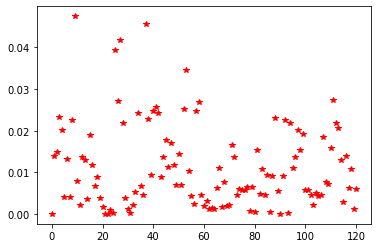

In [364]:
plt.plot(np.abs(fSelecter.coef_.transpose()),"r*")
plt.show()